## Import dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/kkatsy/idioms/gpt3.5_ru_idioms.csv')
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'])
df = df.rename(columns={'Unnamed: 0': 'idiom', 'Unnamed: 1': 'sent'})

In [3]:
gpt_dict = {}
for index, row in df.iterrows():
    id = row['idiom']
    sent = row['sent']
    
    if id not in gpt_dict:
        gpt_dict[id] = []
        
    sent = sent.split('. ', 1)[1]
    gpt_dict[id].append(sent)

In [4]:
gpt_dict.keys()

dict_keys(['наплевать в лицо', 'дело жизни и смерти', 'гром и молния', 'впиваться глазами', 'остолбенеть от удивления', 'возвышать голос', 'ни одной копейки', 'надоесть как редька', 'из капли океана', 'попасть на след', 'вкушать плоды', 'покраснеть как рак', 'из мухи делать слона', 'едва переставлять ноги', 'мелькнуло в уме', 'дрожать как лист', 'до поры до времени', 'ни живой души', 'дело тёмное', 'на каждом шагу', 'в глаза смеяться', 'закон не писан', 'прирасти к месту', 'доживать век', 'не помнить себя', 'высунуть язык', 'маху дал', 'говорить чушь', 'на том свете', 'подошвы не стоить'])

In [5]:
df = pd.read_csv('/home/kkatsy/idioms/llama2_ru_idioms.csv')

In [6]:
df.head()

,Unnamed: 0,Unnamed: 1,,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,наплевать в лицо,"1. Я не мог поверить, что он наплевал мне в ли...",NaN,NaN,NaN,NaN,NaN
1,дело жизни и смерти,"1. Я считаю, что это дело жизни и смерти, чтоб...",NaN,NaN,NaN,NaN,NaN
2,гром и молния,"1. Я был поражен громом и молнией, когда увиде...",NaN,NaN,NaN,NaN,NaN
3,впиваться глазами,"1. Она впивалась глазами в его лицо, когда он ...",NaN,NaN,NaN,NaN,NaN
4,остолбенеть от удивления,"1. Я был остолбенеть от удивления, когда увиде...",NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4','Unnamed: 5', 'Unnamed: 6', ' '])
df = df.rename(columns={'Unnamed: 0': 'idiom', 'Unnamed: 1': 'sents'})
df.columns

Index(['idiom', 'sents'], dtype='object')

In [8]:
llama_dict = {}
for index, row in df.iterrows():
    id = row['idiom']
    sentences = row['sents']
    
    if id not in llama_dict:
        llama_dict[id] = []
    
    sentences = sentences.split(')')
    for s in sentences:
        if s!='':
            s = s.split('. ', 1)[1]
            s = s.split(' (', 1)[0]
            llama_dict[id].append(s)

In [9]:
llama_dict.keys()

dict_keys(['наплевать в лицо', 'дело жизни и смерти', 'гром и молния', 'впиваться глазами', 'остолбенеть от удивления', 'возвышать голос', 'нет ни одной копейки', 'надоесть как редька', 'из капли океана', 'попасть на след', 'вкушать плоды', 'покраснеть как рак', 'из мухи делать слона', 'едва переставлять ноги', 'мелькнуло в уме', 'дрожать как лист', 'до поры до времени', 'ни живой души', 'дело тёмное', 'на каждом шагу', 'в глаза смеяться', 'закон не писан', 'прирасти к месту', 'доживать век', 'не помнить себя', 'высунуть язык', 'маху дал', 'говорить чушь', 'на том свете', 'подошвы не стоить'])

## Stats

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize

gpt_total_toks = 0
gpt_total = 0
gpt_chars = 0
llama_total_toks = 0
llama_total = 0
llama_chars = 0
for i in gpt_dict.keys():
    gpt_sents = ' '.join(gpt_dict[i])
    gpt_toks = word_tokenize(gpt_sents)
    gpt_total_toks += len(gpt_toks)
    gpt_total += len(gpt_dict[i]) 
    gpt_chars += len(' '.join(gpt_dict[i]))
    

for i in llama_dict.keys():
    llama_sents = ' '.join(llama_dict[i])
    llama_toks = word_tokenize(llama_sents)
    llama_total_toks += len(llama_toks)
    llama_total += len(llama_dict[i])
    llama_chars += len(' '.join(llama_dict[i]))
    
print('GPT toks: ', gpt_total_toks)
print('Llama toks: ', llama_total_toks)

print('GPT toks/sent: ', gpt_total_toks/gpt_total)
print('Llama toks/sent: ', llama_total_toks/llama_total)

print('GPT chars/sent: ', gpt_chars/gpt_total)
print('Llama chars/sent: ', llama_chars/llama_total)

GPT toks:  9215
Llama toks:  6210
GPT toks/sent:  15.358333333333333
Llama toks/sent:  13.8
GPT chars/sent:  82.985
Llama chars/sent:  66.42


## Unique tokens

In [11]:
gpt_vocab = []
gpt_idioms = []
for i in gpt_dict.keys():
    gpt_sents = ' '.join(gpt_dict[i])
    gpt_toks = word_tokenize(gpt_sents)
    gpt_vocab.extend(gpt_toks)
    gpt_idioms.append(i)

gpt_unique = list(set(gpt_vocab))
gpt_id_toks = list(set(gpt_idioms))

len(gpt_unique)

2171

In [12]:
  
gpt_idiom_list = []
for i in gpt_dict.keys():
    ids = gpt_dict[i]
    tokenized = [word_tokenize(id) for id in ids]
    gpt_idiom_list.extend(tokenized)
    
train_len = [len(list(set(t))) for t in gpt_idiom_list]
max_len = max(train_len)
plt.hist(train_len, bins=20, color='gold', edgecolor = "black") 
plt.title('ChatGPT: Num Unique Tokens Per Sentence')
plt.xlabel('Num Tokens in Sentence')
plt.show() 

NameError: name 'plt' is not defined

In [ ]:
llama_vocab = []
llama_idioms = []
for i in llama_dict.keys():
    llama_sents = ' '.join(llama_dict[i])
    llama_toks = word_tokenize(llama_sents)
    llama_vocab.extend(llama_toks)
    llama_idioms.append(i)
    
llama_unique = list(set(llama_vocab))
llama_id_toks = list(set(llama_idioms))

len(llama_unique)

856

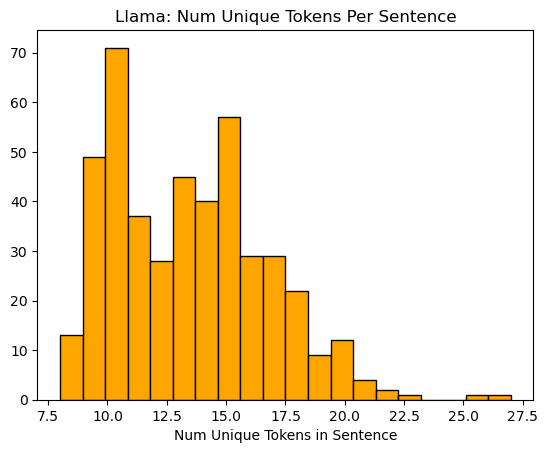

In [ ]:
llama_idiom_list = []
for i in llama_dict.keys():
    ids = llama_dict[i]
    tokenized = [word_tokenize(id) for id in ids]
    llama_idiom_list.extend(tokenized)
    
train_len = [len(list(set(t))) for t in llama_idiom_list]
max_len = max(train_len)
plt.hist(train_len, bins=20, color='orange', edgecolor = "black") 
plt.title('Llama: Num Unique Tokens Per Sentence')
plt.xlabel('Num Unique Tokens in Sentence')
plt.show() 

## Fuzzy matching for Idiom

In [ ]:
! pip install thefuzz

In [ ]:
from thefuzz import fuzz

name = "Kurtis Pykes"
full_name = "hello my name is Kurtis K D Pykes and i like potatoes"

print(f"Token sort ratio similarity score: {fuzz.partial_ratio(name, full_name)}")

Token sort ratio similarity score: 67


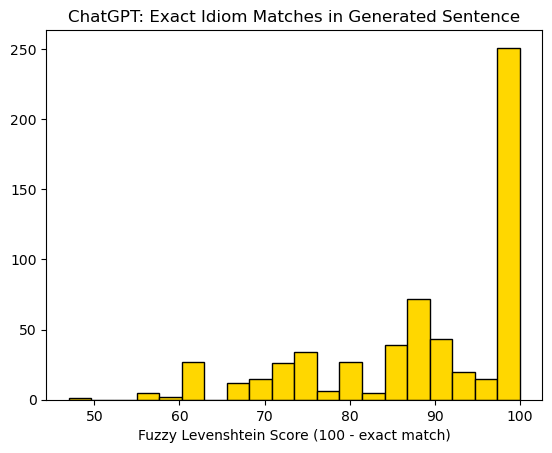

89.08166666666666


In [ ]:
import matplotlib.pyplot as plt
from statistics import mean
fuzzy_gpt = []
fuzzy_llama = []
for id in gpt_dict.keys():
    for s in gpt_dict[id]:
        fuzzy = fuzz.partial_ratio(s, id)
        fuzzy_gpt.append(fuzzy)
        
train_len = [len(list(set(t))) for t in llama_idiom_list]
max_len = max(train_len)
plt.hist(fuzzy_gpt, bins=20, color='gold', edgecolor = "black") 
plt.title('ChatGPT: Exact Idiom Matches in Generated Sentence')
plt.xlabel('Fuzzy Levenshtein Score (100 - exact match)')
plt.show() 
print(mean(fuzzy_gpt))

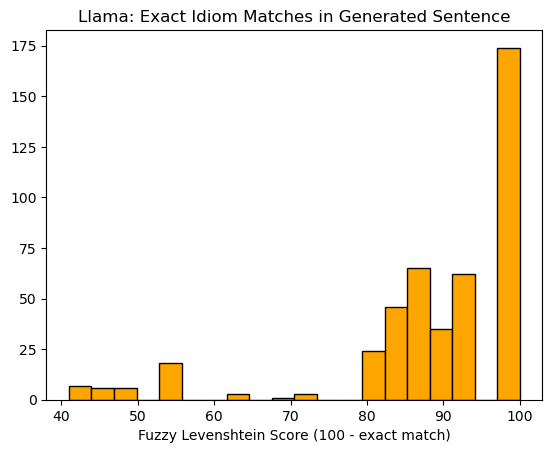

89.19333333333333


In [ ]:
fuzzy_llama = []
for id in llama_dict.keys():
    for s in llama_dict[id]:
        fuzzy = fuzz.partial_ratio(s, id)
        fuzzy_llama.append(fuzzy)
        
train_len = [len(list(set(t))) for t in llama_idiom_list]
max_len = max(train_len)
plt.hist(fuzzy_llama, bins=20, color='orange', edgecolor = "black") 
plt.title('Llama: Exact Idiom Matches in Generated Sentence')
plt.xlabel('Fuzzy Levenshtein Score (100 - exact match)')
plt.show() 
print(mean(fuzzy_llama))

## Semantic similarity

In [ ]:
# %load par3/par3_align/similarity/sim_models.py
import torch
import torch.nn as nn
from torch.nn.modules.distance import CosineSimilarity
import numpy as np

class ParaModel(nn.Module):

    def __init__(self, args, vocab):
        super(ParaModel, self).__init__()

        self.args = args
        self.vocab = vocab
        self.gpu = args.gpu

        self.cosine = CosineSimilarity()

    def compute_mask(self, lengths):

        lengths = lengths.cpu()
        max_len = torch.max(lengths)
        range_row = torch.arange(0, max_len).long()[None, :].expand(lengths.size()[0], max_len)
        mask = lengths[:, None].expand_as(range_row)
        mask = range_row < mask
        mask = mask.float()
        if self.gpu >= 0:
            mask = mask.cuda()
        return mask

    def torchify_batch(self, batch):

        max_len = 0
        for i in batch:
            if len(i.embeddings) > max_len:
                max_len = len(i.embeddings)

        batch_len = len(batch)

        np_sents = np.zeros((batch_len, max_len), dtype='int32')
        np_lens = np.zeros((batch_len,), dtype='int32')

        for i, ex in enumerate(batch):
            np_sents[i, :len(ex.embeddings)] = ex.embeddings
            np_lens[i] = len(ex.embeddings)

        idxs, lengths, masks = torch.from_numpy(np_sents).long(), \
                               torch.from_numpy(np_lens).float().long(), \
                               self.compute_mask(torch.from_numpy(np_lens).long())

        if self.gpu >= 0:
            idxs = idxs.cuda()
            lengths = lengths.cuda()
            masks = masks.cuda()
    
        return idxs, lengths, masks

    def scoring_function(self, g_idxs1, g_mask1, g_lengths1, g_idxs2, g_mask2, g_lengths2):

        g1 = self.encode(g_idxs1, g_mask1, g_lengths1)
        g2 = self.encode(g_idxs2, g_mask2, g_lengths2)
        return self.cosine(g1, g2)

class WordAveraging(ParaModel):

    def __init__(self, args, vocab):
        super(WordAveraging, self).__init__(args, vocab)

        self.vocab = vocab
        self.embedding = nn.Embedding(len(self.vocab), self.args.dim)

        if args.gpu >= 0:
           self.cuda()

    def encode(self, idxs, mask, lengths):
        word_embs = self.embedding(idxs)
        word_embs = word_embs * mask[:, :, None]
        g = word_embs.sum(dim=1) / lengths[:, None].float()
        return g

In [ ]:
# %load par3/par3_align/similarity/sim_utils.py
import io
import numpy as np
import torch

def get_wordmap(textfile):
    words={}
    We = []
    f = io.open(textfile, 'r', encoding='utf-8')
    lines = f.readlines()
    if len(lines[0].split()) == 2:
        lines.pop(0)
    ct = 0
    for (n,i) in enumerate(lines):
        word = i.split(' ', 1)[0]
        vec = i.split(' ', 1)[1].split(' ')
        j = 0
        v = []
        while j < len(vec):
            v.append(float(vec[j]))
            j += 1
        words[word] = ct
        ct += 1
        We.append(v)
    return words, np.array(We)

def get_minibatches_idx(n, minibatch_size, shuffle=False):
    idx_list = np.arange(n, dtype="int32")

    if shuffle:
        np.random.shuffle(idx_list)

    minibatches = []
    minibatch_start = 0
    for i in range(n // minibatch_size):
        minibatches.append(idx_list[minibatch_start:
                                    minibatch_start + minibatch_size])
        minibatch_start += minibatch_size

    if (minibatch_start != n):
        # Make a minibatch out of what is left
        minibatches.append(idx_list[minibatch_start:])

    return zip(range(len(minibatches)), minibatches)

def max_pool(x, lengths, gpu):
    out = torch.FloatTensor(x.size(0), x.size(2)).zero_()
    if gpu >= 0:
        out = out.cuda()
    for i in range(len(lengths)):
        out[i] = torch.max(x[i][0:lengths[i]], 0)[0]
    return out

def mean_pool(x, lengths, gpu):
    out = torch.FloatTensor(x.size(0), x.size(2)).zero_()
    if gpu >= 0:
        out = out.cuda()
    for i in range(len(lengths)):
        out[i] = torch.mean(x[i][0:lengths[i]], 0)
    return out

def lookup(words, w):
    w = w.lower()
    if w in words:
        return words[w]

class Example(object):

    def __init__(self, sentence):
        self.sentence = sentence.strip().lower()
        self.embeddings = []
        self.representation = None

    def populate_embeddings(self, words):
        sentence = self.sentence.lower()
        arr = sentence.split()
        for i in arr:
            emb = lookup(words, i)
            if emb:
                self.embeddings.append(emb)
        if len(self.embeddings) == 0:
            self.embeddings.append(words['UUUNKKK'])

In [ ]:
# %load par3/par3_align/similarity/test_sim.py
import torch

# from par3_align.similarity.sim_models import WordAveraging
# from par3_align.similarity.sim_utils import Example
from nltk.tokenize import TreebankWordTokenizer
import sentencepiece as spm

tok = TreebankWordTokenizer()

model = torch.load('par3/par3_align/similarity/sim/sim.pt')
state_dict = model['state_dict']
vocab_words = model['vocab_words']
args = model['args']
# turn off gpu
model = WordAveraging(args, vocab_words)
model.load_state_dict(state_dict, strict=True)
sp = spm.SentencePieceProcessor()
sp.Load('par3/par3_align/similarity/sim/sim.sp.30k.model')
model.eval()

def make_example(sentence, model):
    sentence = sentence.lower()
    sentence = " ".join(tok.tokenize(sentence))
    sentence = sp.EncodeAsPieces(sentence)
    wp1 = Example(" ".join(sentence))
    wp1.populate_embeddings(model.vocab)
    return wp1

def find_similarity(s1, s2):
    with torch.no_grad():
        s1 = [make_example(x, model) for x in s1]
        s2 = [make_example(x, model) for x in s2]
        wx1, wl1, wm1 = model.torchify_batch(s1)
        wx2, wl2, wm2 = model.torchify_batch(s2)
        BATCH_SIZE = 512
        all_scores = []
        for i in range(0, len(wx1), BATCH_SIZE):
            scores = model.scoring_function(wx1[i:i + BATCH_SIZE], wm1[i:i + BATCH_SIZE], wl1[i:i + BATCH_SIZE],
                                            wx2[i:i + BATCH_SIZE], wm2[i:i + BATCH_SIZE], wl2[i:i + BATCH_SIZE])
            all_scores.extend([x.item() for x in scores])
        return all_scores

def find_similarity_matrix(s1, s2):
    with torch.no_grad():
        s1 = [make_example(x, model) for x in s1]
        s2 = [make_example(x, model) for x in s2]
        wx1, wl1, wm1 = model.torchify_batch(s1)
        wx2, wl2, wm2 = model.torchify_batch(s2)

        BATCH_SIZE = 2000
        vecs1 = []
        vecs2 = []
        for i in range(0, len(wx1), BATCH_SIZE):
            curr_vecs1 = model.encode(idxs=wx1[i:i + BATCH_SIZE],
                                      mask=wm1[i:i + BATCH_SIZE],
                                      lengths=wl1[i:i + BATCH_SIZE])
            vecs1.append(curr_vecs1)
        for i in range(0, len(wx2), BATCH_SIZE):
            curr_vecs2 = model.encode(idxs=wx2[i:i + BATCH_SIZE],
                                      mask=wm2[i:i + BATCH_SIZE],
                                      lengths=wl2[i:i + BATCH_SIZE])
            vecs2.append(curr_vecs2)
        vecs1 = torch.cat(vecs1)
        vecs2 = torch.cat(vecs2)
        dot_product = torch.matmul(vecs1, vecs2.t())

        vecs1_norm = torch.norm(vecs1, dim=1, keepdim=True)
        vecs2_norm = torch.norm(vecs2, dim=1, keepdim=True)
        norm_product = torch.matmul(vecs1_norm, vecs2_norm.t())
    return torch.div(dot_product, norm_product)

def encode_text(s1):
    with torch.no_grad():
        s1 = [make_example(x, model) for x in s1]
        wx1, wl1, wm1 = model.torchify_batch(s1)
        vecs1 = model.encode(idxs=wx1, mask=wm1, lengths=wl1)
        return vecs1


In [ ]:
tok = TreebankWordTokenizer()

model = torch.load('par3/par3_align/similarity/sim/sim.pt')
state_dict = model['state_dict']
vocab_words = model['vocab_words']
args = model['args']
# turn off gpu
model = WordAveraging(args, vocab_words)
model.load_state_dict(state_dict, strict=True)
sp = spm.SentencePieceProcessor()
sp.Load('par3/par3_align/similarity/sim/sim.sp.30k.model')
model.eval()

WordAveraging(
  (cosine): CosineSimilarity()
  (embedding): Embedding(65733, 300)
)

In [ ]:
find_similarity(['beep'], ['boop'])

[0.3913867473602295]

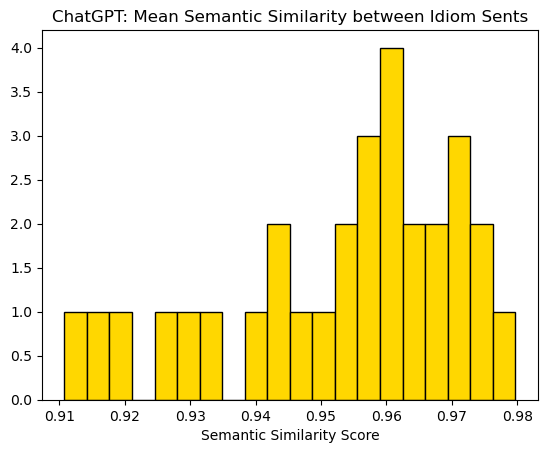

89.08166666666666


In [ ]:
import matplotlib.pyplot as plt
from statistics import mean
import itertools
from operator import itemgetter

sims_gpt = []
for id in gpt_dict.keys():
    pairs = list(itertools.combinations(gpt_dict[id], 2))
    similarities = []
    for s1, s2 in pairs:
        similarities.extend(find_similarity([s1], [s2]))
    mean_sim = mean(similarities)
    sims_gpt.append(mean_sim)
        

max_len = max(train_len)
plt.hist(sims_gpt, bins=20, color='gold', edgecolor = "black") 
plt.title('ChatGPT: Mean Semantic Similarity between Idiom Sents')
plt.xlabel('Semantic Similarity Score')
plt.show() 
print(mean(fuzzy_gpt))

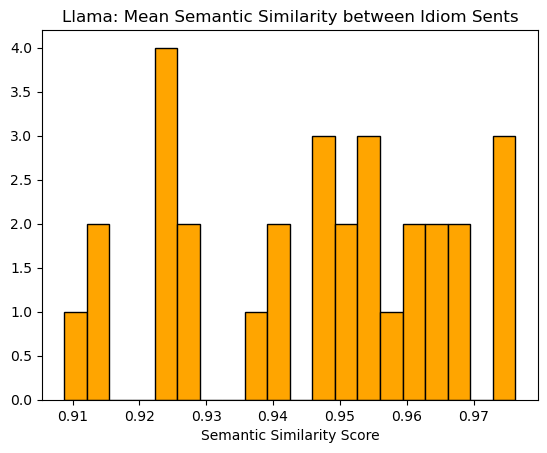

89.19333333333333


In [ ]:
sims_llama = []
for id in llama_dict.keys():
    pairs = list(itertools.combinations(llama_dict[id], 2))
    similarities = []
    for s1, s2 in pairs:
        similarities.extend(find_similarity([s1], [s2]))
    mean_sim = mean(similarities)
    sims_llama.append(mean_sim)
        

plt.hist(sims_llama, bins=20, color='orange', edgecolor = "black") 
plt.title('Llama: Mean Semantic Similarity between Idiom Sents')
plt.xlabel('Semantic Similarity Score')
plt.show() 
print(mean(fuzzy_llama))

In [ ]:
import pickle

with open('/home/kkatsy/idioms/chatGPT_ru_dataset.pickle', 'wb') as handle:
    pickle.dump(gpt_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('/home/kkatsy/idioms/llama2_ru_dataset.pickle', 'wb') as handle:
    pickle.dump(llama_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)